<a href="https://colab.research.google.com/github/mohsinalijoyia4/ADA-dental-Claim/blob/main/AI%20assignment%202%20Q2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4/4 [==============================] - 0s 9ms/step


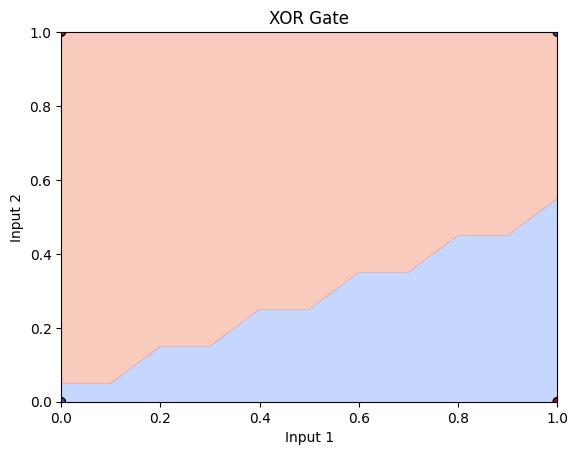

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

model_and = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])
model_and.compile(optimizer='sgd', loss='mse')
model_and.fit(X_train, y_train, epochs=1000, verbose=0)

model_nand = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])
model_nand.compile(optimizer='sgd', loss='mse')
model_nand.fit(X_train, 1 - y_train, epochs=1000, verbose=0)

def xor_gate(x):
    return np.round((model_and.predict(x) + model_nand.predict(x)) / 2)

x_range = np.arange(0, 1.1, 0.1)
y_range = np.arange(0, 1.1, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = xor_gate(np.array([X.flatten(), Y.flatten()]).T).reshape(X.shape)

plt.contourf(X, Y, Z, cmap='coolwarm', levels=[-0.5, 0.5, 1.5], alpha=0.5)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train.flatten(), cmap='coolwarm', edgecolors='k')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Gate')
plt.show()